In [1]:
from numericMethods.ode.run_kut4 import integrate
from numericMethods.rootFinding.ridders import ridder
import numpy as np
from math import isnan



#Define the initial conditions as a function of u - in the shooting method we don't know the proper initial condition for E(0)
#such that the condition phi(d)=V0, where d is the laminar flux region.


#Define the initial conditions as a function of u - in the shooting method we don't know the proper initial condition for E(0)
#such that the condition phi(d)=V0, where d is the laminar flux region.
Psi_all = []
Cp_all = []
Cm_all = []
E_all = []

def init(u):
    return np.array([Cb, Cb, u, 0])

# Define the function F(x,y) such that y' = F(x,y)
def F(x,y):
    #C plus
    Cp =  y[0]
    #C minus
    Cm = y[1]
    #E electric field
    E = y[2]
    #Electric potential
    V = y[3]
    #Function
    #r0 = r/k
    F = np.zeros(4)
    F[0] = Cp*E - r0*Cp[0]

    F[1] = -Cm*E
    F[2] = (Cp-Cm)
    F[3] = -E
    return F

def invert(A):
    B = []
    N = len(A)
    for i in range(0,N):
        B.append(A[N-1-i])
    return np.array(B)


def find_not_nan(L):
    for i in range(0,len(L)-1):
        if(isnan(L[len(L)-1-i]) == False):
            return len(L)-1-i

def r(u):
    X,Y = integrate(F, xStart, init(u), xStop, step)
    V_u = Y[-1,3]
    if(isnan(V_u)):
        index = int(find_not_nan(Y[:,3]))
        V_u = Y[index,3]
    return (V_u-V_0)/V_0

#Here we start the algorithm to find de numeric solution to the system defined by y'=F(x,y). Note that here y
#is a vector with four components

#Define integration range.

xStop = 20.0
xStart = 0.0

#Define the number of steps of integration.
N = 1E3
step = (xStop-xStart)/N

u1 = 10
u2 = 0

z = 2
e = 1.60217662E-19
k = 1.38064852E-23
T = 300
Na = 6.02E23
Fa = 96485.3329#Na * e
R = Na * k
coef = z*e/(k*T)
V_0 = -coef*0.15
D = 1.05
Cb = 1
kf = 1

r0 = kf/(D * k)

epsilon = 80.9 * 8.85418782E-12
k = np.sqrt(2 * Cb * (z*Fa) ** 2 / (R * T * epsilon))
u = ridder(r, u1, u2)

#Plot results, if initial condition for E(0) is found.


import matplotlib.pyplot as plt

if (u != None):
    X,Y = integrate(F, xStart, init(u), xStop, step)
    Cp = invert(Y[:,0])
    Cm = invert(Y[:,1])
    E = 1/coef * invert(Y[:,2])
    phi = 1/coef * invert(Y[:,3])
    xi = X
    print("Border condition at interface is: " + str(-77.357*0.15))
    print("Obtained border condition with shooting method: " + str(phi[0]))
    print("Obtained border condition in the bulk: " + str(E[-1]))
    print("Shooting error: " + str((phi[0]-V_0)/V_0))


#Plot electric potential
    #plt.figure(1)
    #plt.title('Numeric Potential', fontsize=16, fontweight='bold')
    #plt.xlabel(r'$\xi = \kappa x$', fontsize=16)
    #plt.ylabel(r'Dimentionless potential ', fontsize=16)
    #plt.plot(X[:], phi, 'g', label = "Potential")
    #plt.axis([xStart, xStop, -20, -0.0])
    #plt.legend()
    #plt.savefig('potential.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
    #plt.show()

    #Plot electric field
    #plt.figure(2)
    #plt.plot(X[:], E, 'g', label = "Electric Field")
    #plt.axis([xStart, xStop, 0.0, 100])
    #plt.legend()
    #plt.savefig('Efield.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
    #plt.show()

    #Plot Concetration
    #plt.figure(3)
    #plt.title('Numeric Concentration', fontsize=16, fontweight='bold')
    #plt.xlabel(r'$\xi = \kappa x$', fontsize=16)
    #plt.ylabel(r'Molar Concentration ', fontsize=16)
    #plt.plot(X[:], Cp, 'b', label = "Concentration +")
    #plt.axis([xStart, xStop, 0, 1])
    #plt.plot(X[:], Cm, 'r', label = "Concentration -")
    #plt.legend()



    file = open('./results/potential-num-r'+str(r0)+'.txt', 'w')
    file2 = open('./results/cp-num-r'+str(r0)+'.txt', 'w')
    file3 = open('./results/cm-num-r'+str(r0)+'.txt', 'w')
    file4 = open('./results/E-num-r' + str(r0) + '.txt', 'w')


    for i in range(0, len(xi)):
        file.write(str(xi[i]/k*1E9) + "\t" +  str(phi[i]) + "\n")
        file2.write(str(xi[i]/k*1E9) + "\t" +  str(Cp[i]) + "\n")
        file3.write(str(xi[i]/k*1E9) + "\t" +  str(Cm[i]) + "\n")
        file4.write(str(xi[i]/k*1E9) + "\t" + str(E[i]) + "\n")

    file.close()
    file2.close()
    file3.close()
    file4.close()
    Psi_all.append(phi)
    E_all.append(E)
    Cp_all.append(Cp)
    Cm_all.append(Cm)



/Users/creative-work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars
/Users/creative-work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/Users/creative-work/Dropbox/Projects/Current/Magnetic Field Detector/Agustin_Escobar/thesis/thesis/chapters/ch02/ch2/numericMethods/ode/run_kut4.py:22: RuntimeWarning: invalid value encountered in add
  return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
/Users/creative-work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/Users/creative-work/Dropbox/Projects/Current/Magnetic Field Detector/Agustin_Escobar/thesis/thesis/chapters/ch02/ch2/numericMethods/ode/run_kut4.py:19: RuntimeWarning: invalid value encountered in add
  K1 = h*F(x + h/2.0, y + K0/2.0)
/Users/creative-work/Dropbox/Projects/Current/Magnetic Field Detector/Agustin_Escobar/thesis/the

Root found!: x = 5.972721449365448e-12 => r(x) = 0.00549162502551042
Tolerance: 0.01
Border condition at interface is: -11.60355
Obtained border condition with shooting method: -0.15082374375382657
Obtained border condition in the bulk: 7.58441946442652e-14
Shooting error: -0.987003019767285


/Users/creative-work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars
/Users/creative-work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/Users/creative-work/Dropbox/Projects/Current/Magnetic Field Detector/Agustin_Escobar/thesis/thesis/chapters/ch02/ch2/numericMethods/ode/run_kut4.py:22: RuntimeWarning: invalid value encountered in add
  return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
/Users/creative-work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/Users/creative-work/Dropbox/Projects/Current/Magnetic Field Detector/Agustin_Escobar/thesis/thesis/chapters/ch02/ch2/numericMethods/ode/run_kut4.py:19: RuntimeWarning: invalid value encountered in add
  K1 = h*F(x + h/2.0, y + K0/2.0)
/Users/creative-work/Dropbox/Projects/Current/Magnetic Field Detector/Agustin_Escobar/thesis/the

Root found!: x = 3.890586219009849e-08 => r(x) = 0.0005600263707003547
Tolerance: 0.01
Border condition at interface is: -11.60355
Obtained border condition with shooting method: -0.15008400395560506
Obtained border condition in the bulk: 5.028970702973454e-10
Shooting error: -0.9870667655893656
Root found!: x = 3.880016519057271e-06 => r(x) = -0.0009467271814089112
Tolerance: 0.01
Border condition at interface is: -11.60355
Obtained border condition with shooting method: -0.14985799092278868
Obtained border condition in the bulk: 5.0153076049745296e-08
Shooting error: -0.9870862418790183


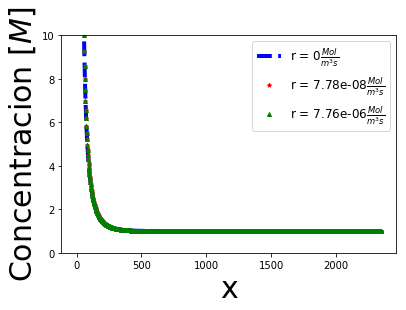

In [11]:
X = X / k*1E9 
mw = 4
fs = 30
plt.figure(1)
plt.title('', fontsize=fs, fontweight='bold')
plt.xlabel(r'x', fontsize=fs)
plt.ylabel(r'Concentracion [$M$]', fontsize=fs)
plt.plot(X, Cp_all[0], 'b--', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Cp_all[1], 'r*', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Cp_all[2], 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.ylim(0,10)
plt.legend(prop={'size': 12})
plt.show()

#plt.savefig('potential.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')

In [12]:
plt.savefig('Concentration-num-'+str(r0)+'.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')

<Figure size 432x288 with 0 Axes>

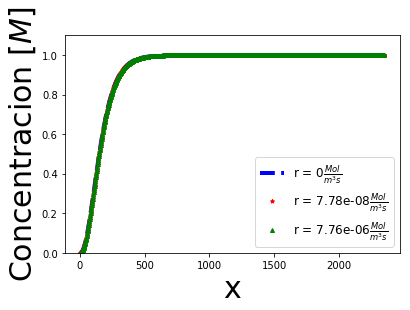

In [13]:

plt.figure(1)
plt.title('', fontsize=fs, fontweight='bold')
plt.xlabel(r'x', fontsize=fs)
plt.ylabel(r'Concentracion [$M$]', fontsize=fs)
plt.plot(X, Cm_all[0], 'b--', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Cm_all[1], 'r*', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Cm_all[2], 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.ylim(0,1.1)
plt.legend(prop={'size': 12})
plt.show()


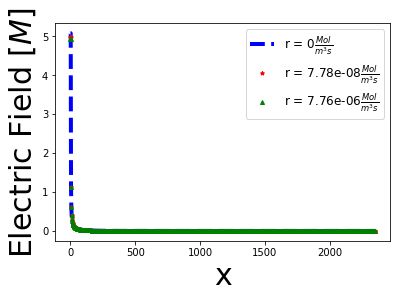

In [14]:

plt.figure(1)
plt.title('', fontsize=fs, fontweight='bold')
plt.xlabel(r'x', fontsize=fs)
plt.ylabel(r'Electric Field [$M$]', fontsize=fs)
plt.plot(X, E_all[0], 'b--', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, E_all[1], 'r*', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, E_all[2], 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.legend(prop={'size': 12})
plt.show()


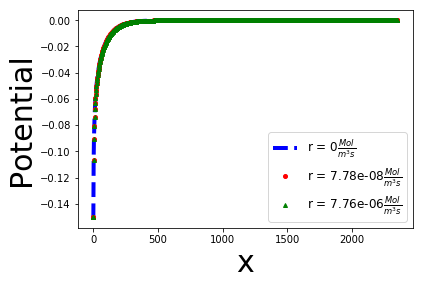

In [15]:
plt.figure(1)
plt.title('', fontsize=fs, fontweight='bold')
plt.xlabel(r'x', fontsize=fs)
plt.ylabel(r'Potential', fontsize=fs)
plt.plot(X, Psi_all[0], 'b--', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Psi_all[1], 'ro', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Psi_all[2], 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.legend(prop={'size': 12})
plt.show()

In [46]:
def remove_points(A):
    A = np.delete(A, [1, 2, 3])
    for i in range(0,int(len(A)/4)):
        index = i+4
        A = np.delete(A, [index-2, index-1, index])
    return A

plt.figure(figsize=(20,16))
plt.suptitle('Numeric Analysis of Steady State', fontsize=fs*1.5)
plt.subplot(2,2,1)
plt.title(r'(a)', fontsize=fs, fontweight='bold')
plt.ylabel(r'Concentracion [$Mol/m^3$]', fontsize=fs)

plt.plot(remove_points(X), remove_points(Cp_all[0]), 'b--', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot(remove_points(X), remove_points(Cp_all[1]), 'rs', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot(remove_points(X), remove_points(Cp_all[2]), 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.ylim(0,2.5)
#plt.legend(prop={'size': 12})

plt.subplot(2,2,2)
plt.title('(b)', fontsize=fs, fontweight='bold')

plt.plot(remove_points(X), remove_points(Cm_all[0]), 'b--', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot(remove_points(X), remove_points(Cm_all[1]), 'rs', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot(remove_points(X), remove_points(Cm_all[2]), 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.ylim(0,1.1)
#plt.legend(prop={'size': 12})

plt.subplot(2,2,3)
plt.title(r'(c)', fontsize=fs, fontweight='bold')
plt.xlabel(r'x [nm]', fontsize=fs)
plt.ylabel(r'Electric Field [$V/m$]', fontsize=fs)
plt.plot(remove_points(X), remove_points(E_all[0]), 'b--', linewidth=mw)#, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot(remove_points(X), remove_points(E_all[1]), 'rs', markersize=mw)#, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot(remove_points(X), remove_points(E_all[2]), 'g^', markersize=mw)#, markersize=4, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
#plt.legend(prop={'size': 12})

plt.subplot(2,2,4)
plt.title(r'(d)', fontsize=fs, fontweight='bold')
plt.xlabel(r'x [nm]', fontsize=fs)
plt.ylabel(r'Potential [$V$]', fontsize=fs)
plt.plot(remove_points(X), remove_points(Psi_all[0]), 'b--', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot(remove_points(X), remove_points(Psi_all[1]), 'rs', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot(remove_points(X), remove_points(Psi_all[2]), 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.legend(prop={'size': 24})

plt.savefig('../../../img/results-numeric.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')

plt.show()



NameError: name 'plt' is not defined

In [75]:
import numpy as np
from numericMethods.rootFinding.gaussPivot import gaussPivot
import math
def newtonRaphson2(f,x,tol=1.0e-9):
    def jacobian(f,x):
        h = 1.0e-4
        n = len(x)
        jac = np.zeros((n,n))
        f0 = f(x)
        for i in range(n):
            temp = x[i]
            x[i] = temp + h
            f1 = f(x)
            x[i] = temp
            jac[:,i] = (f1 - f0)/h
        return jac,f0
    for i in range(30):
        jac,f0 = jacobian(f,x)
        if math.sqrt(np.dot(f0,f0)/len(x)) < tol: return x
        dx = gaussPivot(jac,-f0)
        x = x + dx
        if math.sqrt(np.dot(dx,dx)) < tol*max(max(abs(x)),1.0):
            return x
    print('Too many iterations')

In [95]:
def f(x):
    return np.array(x[0]**2 + x[1]**2 )

In [96]:
x = np.array([2, 1])
newtonRaphson2(f, x)

TypeError: object of type 'numpy.int64' has no len()